In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_tot = pd.read_csv('chegadas_total.csv')

column_specs = {'continente': 'category', 
                'cod_continente': 'int', 
                'pais': 'category',
                'cod_pais': 'int',
                'uf': 'category',
                'cod_uf': 'int',
                'via': 'category',
                'cod_via': 'int',
                'ano': 'int',
                'mes': 'category',
                'cod_mes': 'int',
                'chegadas': 'int'}

df_tot = df_tot.astype(column_specs)
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943820 entries, 0 to 943819
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   continente      943820 non-null  category
 1   cod_continente  943820 non-null  int32   
 2   pais            943820 non-null  category
 3   cod_pais        943820 non-null  int32   
 4   uf              943820 non-null  category
 5   cod_uf          943820 non-null  int32   
 6   via             943820 non-null  category
 7   cod_via         943820 non-null  int32   
 8   ano             943820 non-null  int32   
 9   mes             943820 non-null  category
 10  cod_mes         943820 non-null  int32   
 11  chegadas        943820 non-null  int32   
dtypes: category(5), int32(7)
memory usage: 29.7 MB


In [4]:
df = df_tot[df_tot['cod_uf'] == 19]
df.head()

,continente,cod_continente,pais,cod_pais,uf,cod_uf,via,cod_via,ano,mes,cod_mes,chegadas
11172,África,1,África do Sul,2,Rio de Janeiro,19,Aérea,1,1989,janeiro,1,683
11173,África,1,Angola,6,Rio de Janeiro,19,Aérea,1,1989,janeiro,1,424
11174,África,1,Nigéria,162,Rio de Janeiro,19,Aérea,1,1989,janeiro,1,138
11175,África,1,Outros países,998,Rio de Janeiro,19,Aérea,1,1989,janeiro,1,405
11176,América Central e Caribe,2,Costa Rica,53,Rio de Janeiro,19,Aérea,1,1989,janeiro,1,90


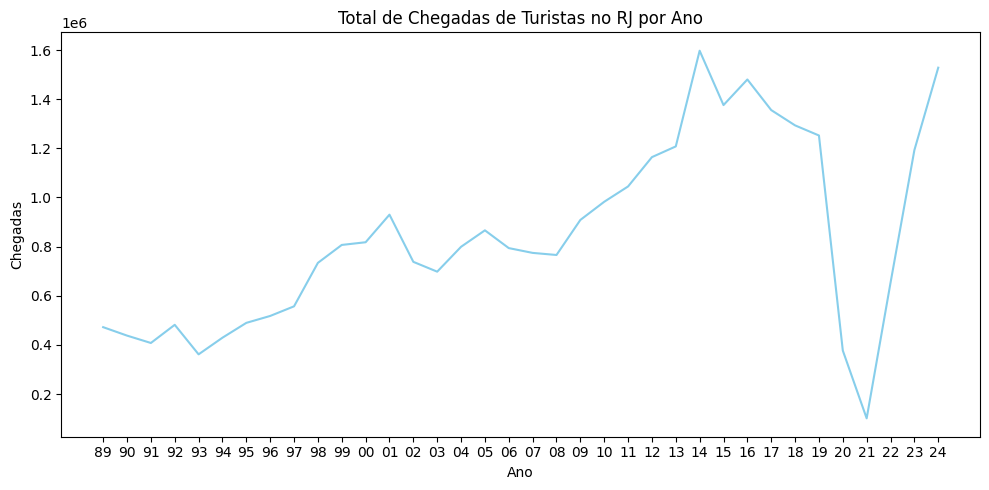

In [5]:
df_ano = df.groupby(['ano'], as_index=False)['chegadas'].sum()
anos_formatados = df_ano['ano'].astype(str).str[-2:]

plt.figure(figsize=(10, 5))
plt.plot(anos_formatados, df_ano['chegadas'], color='skyblue')
plt.title('Total de Chegadas de Turistas no RJ por Ano')
plt.xlabel('Ano')
plt.ylabel('Chegadas')
plt.tight_layout()

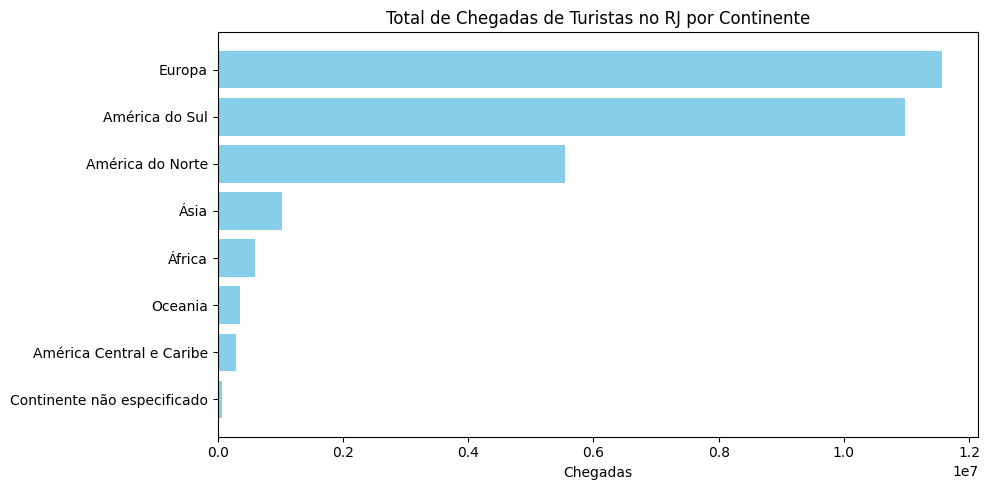

In [6]:
df_continente = df.groupby(['continente'], as_index=False)['chegadas'].sum().sort_values(by='chegadas')

plt.figure(figsize=(10, 5))
plt.barh(df_continente['continente'], df_continente['chegadas'], color='skyblue')
plt.title('Total de Chegadas de Turistas no RJ por Continente')
plt.xlabel('Chegadas')
plt.tight_layout()

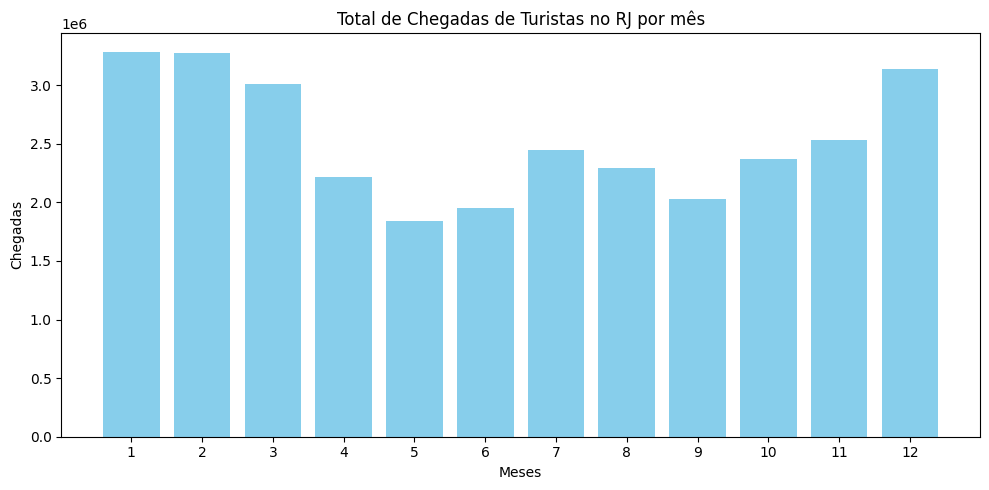

In [7]:
df_mes = df.groupby(['cod_mes'], as_index=False)['chegadas'].sum()

plt.figure(figsize=(10, 5))
plt.bar(df_mes['cod_mes'], df_mes['chegadas'], color='skyblue')
plt.title('Total de Chegadas de Turistas no RJ por mês')
plt.xlabel('Meses')
plt.ylabel('Chegadas')
plt.xticks(df_mes['cod_mes'])
plt.tight_layout()

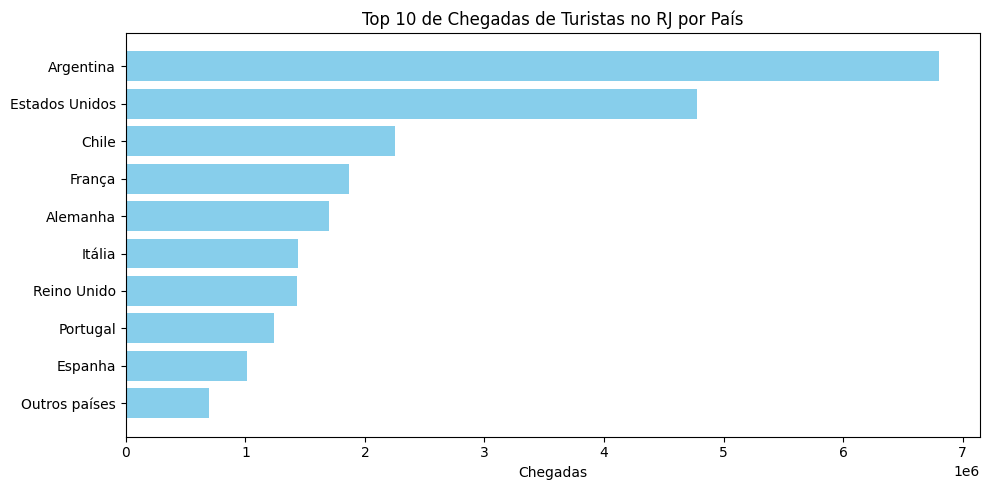

In [8]:
df_pais = df.groupby('pais', as_index=False)['chegadas'].sum().sort_values(by='chegadas')
df_top10 = df_pais.tail(10)

plt.figure(figsize=(10, 5))
plt.barh(df_top10['pais'], df_top10['chegadas'], color='skyblue')
plt.title('Top 10 de Chegadas de Turistas no RJ por País')
plt.xlabel('Chegadas')
plt.tight_layout()

Text(0.5, 1.0, 'Distribuição de Chegadas por Via')

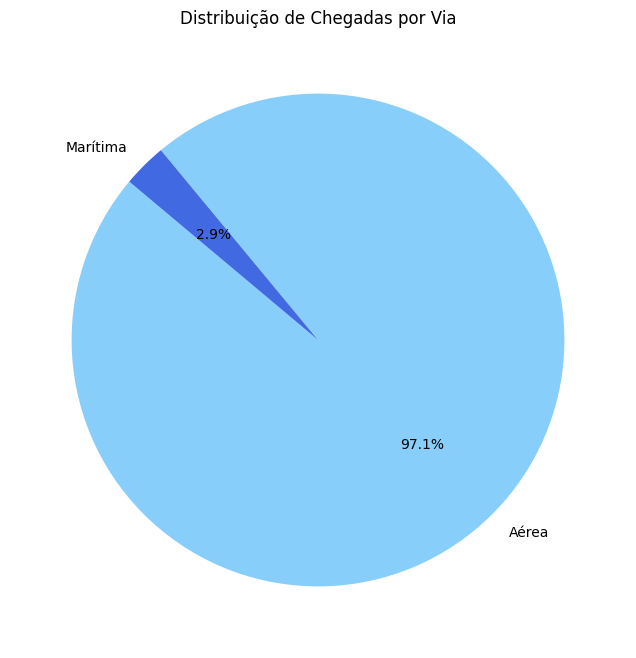

In [9]:
df_vias = df.groupby('via', as_index=False)['chegadas'].sum()
df_vias = df_vias[df_vias['chegadas'] > 0]

plt.figure(figsize=(8, 8))
plt.pie(df_vias['chegadas'], labels=df_vias['via'], autopct='%1.1f%%', startangle=140, colors=['lightskyblue', 'royalblue'])

plt.title('Distribuição de Chegadas por Via')

In [39]:
max_ano = f"{df_ano['chegadas'].max()} ({df_ano.loc[df_ano['chegadas'].idxmax()]['ano']})"
min_ano = f"{df_ano['chegadas'].min()} ({df_ano.loc[df_ano['chegadas'].idxmin()]['ano']})"

df_dados = pd.DataFrame({'média': [df_ano['chegadas'].mean()],
                         'mediana': [df_ano['chegadas'].median()],
                         'max': [max_ano],
                         'min': [min_ano]})

df_dados

,média,mediana,max,min
0,844402.0,796754.0,1597153 (2014),101487 (2021)
